<a href="https://colab.research.google.com/github/Regina00at/2020-01-20191068-JinaKim-Machine-Learning-Programming/blob/master/lesson6_rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

# pre-setting to use google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
# pre-setting

In [0]:
from fastai.tabular import *
# last pre-setting, import fastai.tabular library 

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/rossmann')
train_df = pd.read_pickle(path/'train_clean')
# Since I put train_clean pickle file on my google drive, let pandas reader know google drive path.

In [7]:
train_df.head().T
# print the head part of the pickle data

,0,1,2,3,4
level_0,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
Promo_bw,5,5,5,5,5
SchoolHoliday_fw,7,1,5,1,1
StateHoliday_fw,0,0,0,0,0


In [8]:
n = len(train_df); n
# how long the dataset is? 844338

844338

### Experimenting with a sample

In [0]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

# create little small subsets of a data

In [10]:
small_train_df.head()
# show one of them : train_df

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
281,282,5,NaN,1220.0,61,4761
1134,22,4,"Jan,Apr,Jul,Oct",1040.0,59,5685
1161,49,4,NaN,18010.0,60,8996
1553,442,4,"Feb,May,Aug,Nov",500.0,60,5809
1630,519,4,"Jan,Apr,Jul,Oct",2510.0,86,6309


In [11]:
small_test_df.head()
# show one of them : test_df

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
422915,1006,1,"Feb,May,Aug,Nov",3890.0,65,10584
423154,100,6,NaN,17930.0,70,7195
423352,298,6,NaN,19840.0,70,7023
423958,908,6,"Jan,Apr,Jul,Oct",1980.0,53,2157
426173,902,4,"Jan,Apr,Jul,Oct",310.0,67,4027


In [0]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

# categorize the small datasets

In [13]:
small_test_df.head()
# print them again

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
422915,1006,1,"Feb,May,Aug,Nov",3890.0,65,10584
423154,100,6,NaN,17930.0,70,7195
423352,298,6,NaN,19840.0,70,7023
423958,908,6,"Jan,Apr,Jul,Oct",1980.0,53,2157
426173,902,4,"Jan,Apr,Jul,Oct",310.0,67,4027


In [14]:
small_train_df.PromoInterval.cat.categories
# print the categories of train_df

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [15]:
small_train_df['PromoInterval'].cat.codes[:5]
# bring up the first five PromoInterval category's data

281    -1
1134    1
1161   -1
1553    0
1630    1
dtype: int8

In [0]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)
# another useful preprocessor : fill_missing

In [17]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]
# bring up the true data of competitiondistance_na

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
67391,879,4,"Feb,May,Aug,Nov",2395.0,88,4346,True
69033,291,2,NaN,2395.0,49,9056,True
83645,291,6,NaN,2395.0,60,6560,True
348898,291,6,NaN,2395.0,66,4329,True


### Preparing full data set

In [0]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

# bring up the full data 

In [20]:
len(train_df),len(test_df)
# how long are they?
# train_df : 844338
# test_df : 41088

(844338, 41088)

In [0]:
procs=[FillMissing, Categorify, Normalize]
# process we will do

In [0]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

# we have those kinds of category

In [0]:
# from this cell, preprocessing for making tabular list data.
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [24]:
test_df['Date'].min(), test_df['Date'].max()
# min and max value of the test_df['Date'] data.

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [25]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut
# cut one of the data

41395

In [0]:
valid_idx = range(cut)
# valid index = range of cut

In [27]:
df[dep_var].head()
# print few of them and the information of it

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

# create a tabular list

In [29]:
doc(FloatList)
# document of floatlist

## Model

In [0]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)
# get data after adjusting the few values

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)
# set the learner to train the model

In [32]:
learn.model
# print the information of the model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_runn

In [33]:
len(data.train_ds.cont_names)
# how long is the train_ds.cont_names? 16

16

In [34]:
learn.lr_find()
# find the fastest learning rate

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


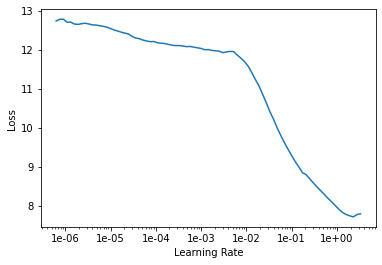

In [35]:
learn.recorder.plot()
# plot the result of finding learning rate

In [36]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)
# train the model for 5 times

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.027038,0.020767,0.141090,02:32
1,0.018635,0.017861,0.130104,02:29
2,0.018250,0.020246,0.132956,02:30
3,0.013161,0.015047,0.113266,02:30
4,0.012232,0.011919,0.105769,02:30


In [0]:
learn.save('1')
# save as l

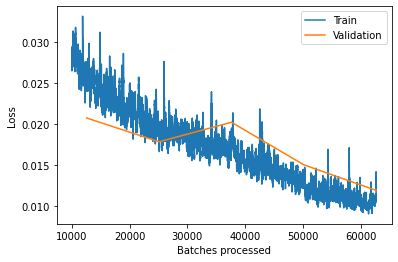

In [38]:
learn.recorder.plot_losses(skip_start=10000)
# plot the graph

In [0]:
learn.load('1');
# load saved model l

In [40]:
learn.fit_one_cycle(5, 3e-4)
# train the model for 5 times

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.013716,0.012936,0.112500,02:30
1,0.011905,0.015651,0.124011,02:30
2,0.010196,0.019977,0.126827,02:30
3,0.010152,0.015011,0.126119,02:31
4,0.009534,0.017259,0.113051,02:32


In [41]:
learn.fit_one_cycle(5, 3e-4)
# train the model for 5 more times

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.009800,0.018983,0.133360,02:34
1,0.011880,0.019202,0.118996,02:34
2,0.010650,0.017699,0.128550,02:32
3,0.009315,0.016338,0.134618,02:32
4,0.009124,0.014432,0.123952,02:31


(10th place in the competition was 0.108)

In [42]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)
# submit the result into csv file